In [1]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
#load data 
world_cup = pd.read_csv('C:/Users/kunal/Downloads/Big_data/data/datasets/World Cup 2019 Dataset.csv')
results = pd.read_csv('C:/Users/kunal/Downloads/Big_data/data/datasets/results.csv')

In [3]:
world_cup.head()

,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [4]:
results.head()

#Displaying matches played by "India"
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
india.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [5]:
#creating a column for matches played in 2010
year = []
for row in india['date']:
    year.append(int(row[7:]))
india ['match_year']= year
print(india.head(10))
india_2010 = india[india.match_year >= 10]
india_2010.count()

         date      Team_1        Team_2        Winner     Margin     Ground  \
1    5-Jan-10       India     Sri Lanka     Sri Lanka  5 wickets      Dhaka   
2    7-Jan-10  Bangladesh         India         India  6 wickets      Dhaka   
4   10-Jan-10       India     Sri Lanka         India  8 wickets      Dhaka   
5   11-Jan-10  Bangladesh         India         India  6 wickets      Dhaka   
6   13-Jan-10       India     Sri Lanka     Sri Lanka  4 wickets      Dhaka   
24  21-Feb-10       India  South Africa         India      1 run     Jaipur   
25  24-Feb-10       India  South Africa         India   153 runs    Gwalior   
26  27-Feb-10       India  South Africa  South Africa    90 runs  Ahmedabad   
44  28-May-10    Zimbabwe         India      Zimbabwe  6 wickets   Bulawayo   
46  30-May-10       India     Sri Lanka         India  7 wickets   Bulawayo   

    match_year  
1            0  
2            0  
4           10  
5           10  
6           10  
24          10  
25         

date          151
Team_1        151
Team_2        151
Winner        151
Margin        142
Ground        151
match_year    151
dtype: int64

In [6]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

df_teams.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [7]:
#dropping columns that wll not affect match outcomes
df_teams_2010 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
df_teams_2010.head(20)

#Building the model
#the prediction label: The winning_team column will show "1" Team 1 has won and "2" if the away team has won.

df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

df_teams_2010.head(20)

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India
5,Bangladesh,India,India
6,India,Sri Lanka,Sri Lanka
7,Australia,Pakistan,Australia
8,Australia,Pakistan,Australia
9,Australia,Pakistan,Australia


In [8]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=None,
                              random_state=0)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.700
Test set accuracy:  0.671


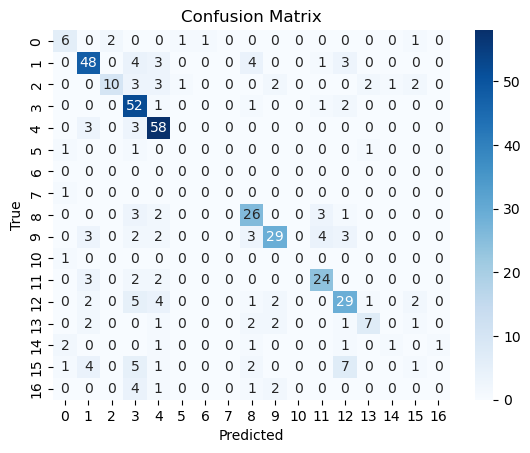

In [9]:
# Make predictions on test set
y_pred = rf.predict(X_test)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
#adding ICC rankings
#the team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "Team_1" column

# Loading new datasets
ranking = pd.read_csv('C:/Users/kunal/Downloads/Big_data/data/datasets/icc_rankings.csv') 
fixtures = pd.read_csv('C:/Users/kunal/Downloads/Big_data/data/datasets/fixtures.csv')

# List for storing the group stage games
pred_set = []

ranking.head()

,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109


In [11]:
fixtures.head()

,Round Number,Date,Location,Team_1,Team_2,Group,Result
0,1,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN


In [12]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [13]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [14]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#group matches 
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]): # to iterate over each row in the "fixture" dataframe
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

# List of tuples before 
semi = [('New Zealand', 'India'),
            ('England', 'South Africa')]

South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

In [16]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
        
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
    
    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

clean_and_predict(semi, ranking, final, rf)

New Zealand and India
Winner: India

South Africa and England
Winner: England



In [17]:
# Finals
finals = [('India', 'England')]

clean_and_predict(finals, ranking, final, rf)

India and England
Winner: England

